In [1]:
import os
import numpy as np
import pandas as pd
import random
import math
from datetime import datetime
from math import radians, cos, sin, asin, sqrt
import networkx as nx
import matplotlib.pyplot as plt

/home/uscc/.pyenv/versions/3.6.8/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### 經緯度換算

In [2]:
def haversine(lon1, lat1, lon2, lat2): # 經度1，緯度1，經度2，緯度2 （十進制）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 將十進制轉為弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半徑，單位為公里
    return c * r * 1000

### File generate

In [4]:
##########edit group size here and day##########
groups = 10
day = 10
########################################

edge_list = []
edge_data = pd.read_csv('./gowalla/gowalla_friendship.csv',sep=',')


for i in range(len(edge_data)):
    edge_list.append([edge_data.iloc[i,0], edge_data.iloc[i,1]])


G = nx.Graph()
# add edge
for i in range(len(edge_list)):
    G.add_edge(edge_list[i][0],edge_list[i][1])

    
print('edge number :',G.number_of_edges(),'\nnode number :',G.number_of_nodes())

all_edge = list(G.edges)
all_edge.sort()

all_node = list(G.nodes)
all_node.sort()


##### graph.txt
with open('./graph_1.txt','w') as f:
    f.write('{} {},{},{}\n'.format('g',G.number_of_nodes(),G.number_of_edges(),day * groups))
f.close()

#### Node
with open('./graph_1.txt','a') as f:
    for i in all_node:
        node_type = random.randint(0,3)
        R = round(random.uniform(0,1),3)
        Ct = round(random.uniform(0,1),3)
        S = round(random.uniform(0,1),3)
        Cr = round(random.uniform(0,1),3)
        HI = round(random.uniform(0,1),3)
        HA = round(random.uniform(0,1),3)
        HT = round(random.uniform(0,1),3)
        D = round(random.uniform(0,1),3)
        f.write('{} {},{},{},{},{},{},{},{},{},{}\n'.format('n',i - 1 , node_type, R, Ct, S, Cr, HI, HA, HT, D))
f.close()

#### Edge
with open('./graph_1.txt','a') as f:
    for i in range(len(all_edge)):
        prob = random.uniform(0,1)
        node1 = all_edge[i][0] - 1
        node2 = all_edge[i][1] - 1
        f.write('{} {},{},{}\n'.format('e', node1,node2,round(prob,3)))
f.close()


edge number : 2209170 
node number : 407533


### Read the checkin data

In [5]:
path = './original/gowalla_checkins_chron.csv'

check_in_data = pd.read_csv(path,sep=',')
all_id = check_in_data.iloc[:,0]
check_in_id = np.unique(np.array(all_id))
print('check in id number : ',check_in_id.shape)

check in id number :  (318878,)


In [6]:
place_table = pd.read_csv('./gowalla/gowalla_spots_subset1.csv',sep=',')
pid_table = place_table.iloc[:,0]

#### Calculate user center

In [18]:
# ## init the dict
# user_center = { i : (0,0) for i in all_node }

# all_placeID = check_in_data.iloc[:,1]

# for _id in check_in_id: 
#     if _id % 100 == 0:
#         print(_id)
#     data_len = len(all_placeID[all_id == _id])
#     if data_len >= 3:
#         x = 0
#         y = 0
#         for idx in [1,int(data_len/2),-1]:
#             place = all_placeID[all_id == _id].iloc[idx]
#             x += place_table[pid_table == place].iloc[0,3]
#             y += place_table[pid_table == place].iloc[0,2]
#         x = round(x / 3, 3)
#         y = round(y / 3, 3)
#         user_center[_id] = (x,y)
#     else:
#         place = all_placeID[all_id == _id].iloc[0]
#         x = round(place_table[pid_table == place].iloc[0,3], 3)
#         y = round(place_table[pid_table == place].iloc[0,2], 3)
#         user_center[_id] = (x,y)

100
200
300
500
600
900
1000
1100
1300
2100
2300
2400
2600
2700
2800
2900
3100
3200
3300
3500
3700
3800
3900
4000
4400
4600
4700
5100
5300
5700
6000
6100
6200
6300
6400
6500
6600
6700
6900
7400
7600
7700
8200
8300
8400
8500
8600
8700
9100
10100
10300
10400
10800
11000
11600
11700
12300
12400
12900
13000
13300
13800
14200
14300
14400
14500
14600
14900
15300
15600
15700
15800
15900
16300
16400
16700
16900
17000
17100
17200
17400
17600
17700
17800
18000
18200
18300
18500
18600
18800
18900
19000
19100
19400
19500
19700
19800
20300
20400
20500
20600
20700
20800
21000
21200
21300
21400
21500
21700
21800
22000
22400
22500
22600
22700
22800
22900
23000
23300
23500
23600
23700
23800
24000
24100
24300
24500
24800
24900
25300
25400
25500
25600
25700
25800
26000
26100
26200
26700
27100
27400
27700
28100
28300
28400
28600
28700
28900
29400
29500
29600
29900
33000
33200
33500
33700
34100
35500
36300
36600
36700
36800
37500
38600
39000
39200
39500
39600
41200
42300
42500
42900
43500
43600
43800
44000

350300
350500
350800
351900
352400
352800
353200
353700
353800
353900
354100
354600
355200
355500
356000
356700
356800
357000
357300
357700
357900
358000
358100
358200
358500
358800
359800
360500
360800
361700
361900
362000
362600
362700
362900
363700
363800
364000
364500
364800
364900
365000
365100
365200
365300
365600
365700
366400
367900
368100
368300
368500
368600
368700
369000
369300
369400
369700
369800
370100
370300
371000
371300
371800
372300
372400
372900
373000
373400
373500
373600
374200
374400
374800
374900
375200
375300
375700
375900
376000
376200
376400
377500
377600
377700
378200
378700
379200
379700
380900
381000
381200
381500
381700
381900
382400
383200
383400
383600
383900
384000
384100
384800
385000
385200
385500
385800
386000
386700
386900
387800
388300
388400
389200
389500
389600
389900
390100
390800
391600
392300
393100
393400
393500
393900
394500
394900
395000
395200
395500
395600
396400
396500
396800
397000
397300
397500
397600
397800
397900
398100
398400
398500

2220400
2221000
2221500
2221600
2221900
2222000
2222100
2222300
2222600
2222900
2223000
2223200
2223400
2223600
2223800
2223900
2224000
2224200
2224600
2224700
2224900
2225000
2225500
2225700
2225800
2226300
2226900
2227100
2227500
2227700
2227900
2228000
2228200
2228300
2228400
2228500
2228700
2228800
2228900
2229000
2229100
2229400
2230100
2230200
2230700
2230800
2231000
2231200
2231300
2231800
2232000
2232400
2232600
2232900
2233100
2233200
2233400
2233600
2233700
2234100
2234300
2234500
2234600
2234700
2235000
2235300
2235400
2235500
2235600
2235800
2235900
2236200
2236500
2236800
2237200
2237900
2238200
2238300
2238600
2238800
2238900
2239000
2239800
2239900
2240000
2240100
2240600
2241600
2241700
2242000
2242200
2242500
2242700
2243500
2243700
2244100
2244300
2244500
2244600
2245500
2245800
2246500
2247000
2247100
2247300
2247400
2247900
2248200
2248500
2248700
2248800
2249200
2249400
2249800
2250000
2250300
2250400
2250600
2250800
2250900
2251000
2251500
2251800
2252200
2252400


In [20]:
# # save the user center
# with open('./user_center_1.txt' ,'w') as f:
#     for i in all_node:
#         f.write('{},{},{}\n'.format(i,round(user_center[i][0],4),round(user_center[i][1],4)))
# f.close()

#### Calculate the max radius

In [28]:
user_center_data = pd.read_csv('./user_center_1.txt',header=None,sep=',')
user_x = np.array(user_center_data[:][1])
user_y = np.array(user_center_data[:][2])
#### find the farest x_value on +x axis and -x axis
x_max = np.amax(user_x)
x_min = np.amin(user_x)
#### find the farest y_value on +y axis and -y axis
y_max = np.amax(user_y)
y_min = np.amin(user_y)

length = round(haversine(80,y_max,x_min,y_min),2)
max_radius = round(length/2,2)
print('diagonal length : ',length)
print('max radius : ',max_radius)
print(x_max,y_max,x_min,y_min)

diagonal length :  14588919.09
max radius :  7294459.54
171.62400000000002 176.872 -53.147 -159.496


#### user on the graph

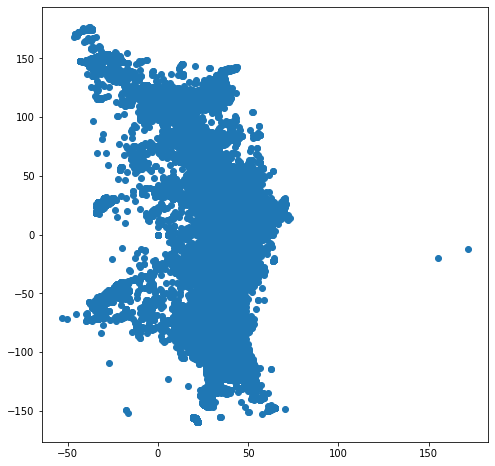

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(user_x,user_y)
plt.show()

#### Select the group

In [30]:
##### group
with open('./graph_1.txt','a') as f:
    for d in range(day):    
        ## random radius by "normal distrubtion"
        radius = np.random.normal(max_radius,scale=1000000,size = groups)
        ## random user be the center
        centers = np.random.randint(0,G.number_of_nodes() - 1,size = groups)
        
        for idx in range(groups):
            # empty set
            sd = set()
            cost = random.randint(1,10)
            lv = random.randint(1,3)
            eta = -1
            # find the user that in the center range
            for i in range(len(all_node)):
                center_x = user_center_data[1][centers[idx]]
                center_y = user_center_data[2][centers[idx]]
                compare_x = user_center_data[1][i]
                compare_y = user_center_data[2][i]
                l = haversine(center_x, center_y ,compare_x,compare_y ) 
                if l <= radius[idx]:
                    sd.add(i)
            f.write('{} {}_{}_{}_{}_{}\n'.format('X', d, cost, lv, eta, ",".join(str(i) for i in sd)))        
f.close() 